In [1]:
from train_test_fns import *
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import ElasticNet


In [2]:
def train_EN_model(train_x, train_y, predict_x):
    #print_title("ElasticNet")
    #train_x, predict_x = standarize_feature(_train_x, _predict_x)

    #l1_ratios = [1e-4, 1e-3, 1e-2, 1e-1]
    #l1_ratios = [1e-5, 1e-4, 1e-3]
    l1_ratios = [.001,.01,.1,.2,.5, 0.99,1]
    #l1_ratios = [.5]
    min_mse = 1
    for r in l1_ratios:
        #t1 = time.time()
        reg_en = ElasticNetCV(
            l1_ratio=r, cv=10, n_jobs=-1, verbose=0, precompute=True)
        reg_en.fit(train_x, train_y)
        n_nonzeros = (reg_en.coef_ != 0).sum()
        _mse = np.mean(reg_en.mse_path_, axis=1)[
            np.where(reg_en.alphas_ == reg_en.alpha_)[0][0]]
        if _mse < min_mse:
            min_mse = _mse
            best_l1_ratio = r
            best_alpha = reg_en.alpha_
        #t2 = time.time()
        print("ratio(%e) -- n: %d -- alpha: %f -- mse: %f -- " %
              (r, n_nonzeros, reg_en.alpha_, _mse))

    print("Best l1_ratio and alpha: %f, %f" % (best_l1_ratio, best_alpha))
    # predict_model
    reg = ElasticNet(l1_ratio=best_l1_ratio, alpha=best_alpha)
    reg.fit(train_x, train_y)
    n_nonzeros = (reg.coef_ != 0).sum()

    predict_y = reg.predict(predict_x)
    train_y_pred = reg.predict(train_x)
    return {"y": predict_y, "train_y": train_y_pred, "coef": reg.coef_, 'n_cols':n_nonzeros,'l1':best_l1_ratio}

In [ ]:
a,b,c,d = load_and_split_data(1)

In [ ]:
a.shape

In [ ]:
b.shape

In [ ]:
c.shape
d.shape

In [ ]:
vals = train_EN_model(a,b,c)

In [ ]:
10**(MSE(vals['y'],d)**.5)

In [3]:
def elastic_net_cv_with_cutoffs():
    cutoffs = [(i+1)*100000 for i in range(20)]
    errors = []
    cols = []
    for i in cutoffs:
        train_X, train_y, test_X,test_y = load_and_split_data(i)
        vals = train_EN_model(train_X,train_y,test_X)
        preds = vals['y']
        error = 10**(MSE(preds,test_y)**.5)
        errors.append(error)
        cols.append(vals['n_cols'])
    return cutoffs, errors,cols

In [4]:
cut,err,cols = elastic_net_cv_with_cutoffs()

ratio(1.000000e-03) -- n: 68 -- alpha: 0.058260 -- mse: 0.161927 -- 
ratio(1.000000e-02) -- n: 66 -- alpha: 0.005826 -- mse: 0.128336 -- 
ratio(1.000000e-01) -- n: 63 -- alpha: 0.000670 -- mse: 0.124598 -- 
ratio(2.000000e-01) -- n: 57 -- alpha: 0.000774 -- mse: 0.124514 -- 
ratio(5.000000e-01) -- n: 52 -- alpha: 0.000541 -- mse: 0.124435 -- 
ratio(9.900000e-01) -- n: 50 -- alpha: 0.000337 -- mse: 0.124491 -- 
ratio(1.000000e+00) -- n: 50 -- alpha: 0.000333 -- mse: 0.124493 -- 
Best l1_ratio and alpha: 0.500000, 0.000541
ratio(1.000000e-03) -- n: 68 -- alpha: 0.058260 -- mse: 0.161927 -- 
ratio(1.000000e-02) -- n: 66 -- alpha: 0.005826 -- mse: 0.128336 -- 
ratio(1.000000e-01) -- n: 63 -- alpha: 0.000670 -- mse: 0.124598 -- 
ratio(2.000000e-01) -- n: 57 -- alpha: 0.000774 -- mse: 0.124514 -- 
ratio(5.000000e-01) -- n: 52 -- alpha: 0.000541 -- mse: 0.124435 -- 
ratio(9.900000e-01) -- n: 50 -- alpha: 0.000337 -- mse: 0.124491 -- 
ratio(1.000000e+00) -- n: 50 -- alpha: 0.000333 -- mse: 0.1

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ratio(5.000000e-01) -- n: 60 -- alpha: 0.000121 -- mse: 0.082166 -- 
ratio(9.900000e-01) -- n: 57 -- alpha: 0.000070 -- mse: 0.082162 -- 
ratio(1.000000e+00) -- n: 57 -- alpha: 0.000069 -- mse: 0.082162 -- 
Best l1_ratio and alpha: 1.000000, 0.000069
ratio(1.000000e-03) -- n: 67 -- alpha: 0.047958 -- mse: 0.094219 -- 
ratio(1.000000e-02) -- n: 66 -- alpha: 0.004796 -- mse: 0.079440 -- 
ratio(1.000000e-01) -- n: 62 -- alpha: 0.000480 -- mse: 0.076628 -- 
ratio(2.000000e-01) -- n: 60 -- alpha: 0.000296 -- mse: 0.076582 -- 
ratio(5.000000e-01) -- n: 56 -- alpha: 0.000238 -- mse: 0.076551 -- 
ratio(9.900000e-01) -- n: 53 -- alpha: 0.000138 -- mse: 0.076555 -- 
ratio(1.000000e+00) -- n: 53 -- alpha: 0.000137 -- mse: 0.076556 -- 
Best l1_ratio and alpha: 0.500000, 0.000238
ratio(1.000000e-03) -- n: 69 -- alpha: 0.046027 -- mse: 0.089724 -- 
ratio(1.000000e-02) -- n: 66 -- alpha: 0.004603 -- mse: 0.075337 -- 
ratio(1.000000e-01) -- n: 65 -- alpha: 0.000460 -- mse: 0.072696 -- 
ratio(2.000000e

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ratio(5.000000e-01) -- n: 62 -- alpha: 0.000128 -- mse: 0.066659 -- 
ratio(9.900000e-01) -- n: 49 -- alpha: 0.000299 -- mse: 0.066616 -- 


/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ratio(1.000000e+00) -- n: 49 -- alpha: 0.000296 -- mse: 0.066617 -- 
Best l1_ratio and alpha: 0.990000, 0.000299
ratio(1.000000e-03) -- n: 69 -- alpha: 0.035135 -- mse: 0.075526 -- 
ratio(1.000000e-02) -- n: 66 -- alpha: 0.003514 -- mse: 0.063959 -- 
ratio(1.000000e-01) -- n: 64 -- alpha: 0.000351 -- mse: 0.062115 -- 
ratio(2.000000e-01) -- n: 63 -- alpha: 0.000286 -- mse: 0.062111 -- 
ratio(5.000000e-01) -- n: 53 -- alpha: 0.000431 -- mse: 0.062087 -- 


/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ratio(9.900000e-01) -- n: 43 -- alpha: 0.000355 -- mse: 0.061995 -- 


/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ratio(1.000000e+00) -- n: 42 -- alpha: 0.000351 -- mse: 0.061994 -- 
Best l1_ratio and alpha: 1.000000, 0.000351
ratio(1.000000e-03) -- n: 67 -- alpha: 0.032180 -- mse: 0.070981 -- 
ratio(1.000000e-02) -- n: 68 -- alpha: 0.003218 -- mse: 0.060432 -- 
ratio(1.000000e-01) -- n: 66 -- alpha: 0.000322 -- mse: 0.058774 -- 
ratio(2.000000e-01) -- n: 65 -- alpha: 0.000161 -- mse: 0.058775 -- 
ratio(5.000000e-01) -- n: 49 -- alpha: 0.000522 -- mse: 0.058740 -- 


/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ratio(9.900000e-01) -- n: 45 -- alpha: 0.000349 -- mse: 0.058661 -- 


/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ratio(1.000000e+00) -- n: 45 -- alpha: 0.000345 -- mse: 0.058661 -- 
Best l1_ratio and alpha: 1.000000, 0.000345
ratio(1.000000e-03) -- n: 68 -- alpha: 0.029194 -- mse: 0.066917 -- 
ratio(1.000000e-02) -- n: 66 -- alpha: 0.002919 -- mse: 0.057417 -- 
ratio(1.000000e-01) -- n: 64 -- alpha: 0.000292 -- mse: 0.055961 -- 
ratio(2.000000e-01) -- n: 62 -- alpha: 0.000180 -- mse: 0.055966 -- 
ratio(5.000000e-01) -- n: 50 -- alpha: 0.000508 -- mse: 0.055867 -- 


/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ratio(9.900000e-01) -- n: 43 -- alpha: 0.000339 -- mse: 0.055789 -- 


/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ratio(1.000000e+00) -- n: 43 -- alpha: 0.000336 -- mse: 0.055789 -- 
Best l1_ratio and alpha: 1.000000, 0.000336
ratio(1.000000e-03) -- n: 69 -- alpha: 0.028262 -- mse: 0.064177 -- 
ratio(1.000000e-02) -- n: 69 -- alpha: 0.002826 -- mse: 0.055225 -- 
ratio(1.000000e-01) -- n: 65 -- alpha: 0.000325 -- mse: 0.053857 -- 
ratio(2.000000e-01) -- n: 63 -- alpha: 0.000326 -- mse: 0.053844 -- 
ratio(5.000000e-01) -- n: 52 -- alpha: 0.000428 -- mse: 0.053794 -- 


/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ratio(9.900000e-01) -- n: 44 -- alpha: 0.000328 -- mse: 0.053720 -- 


/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ratio(1.000000e+00) -- n: 44 -- alpha: 0.000325 -- mse: 0.053719 -- 
Best l1_ratio and alpha: 1.000000, 0.000325
ratio(1.000000e-03) -- n: 69 -- alpha: 0.026298 -- mse: 0.062147 -- 
ratio(1.000000e-02) -- n: 69 -- alpha: 0.002630 -- mse: 0.054062 -- 
ratio(1.000000e-01) -- n: 66 -- alpha: 0.000263 -- mse: 0.052896 -- 
ratio(2.000000e-01) -- n: 65 -- alpha: 0.000230 -- mse: 0.052906 -- 
ratio(5.000000e-01) -- n: 50 -- alpha: 0.000491 -- mse: 0.052847 -- 


/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ratio(9.900000e-01) -- n: 46 -- alpha: 0.000327 -- mse: 0.052780 -- 


/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ratio(1.000000e+00) -- n: 46 -- alpha: 0.000324 -- mse: 0.052780 -- 
Best l1_ratio and alpha: 0.990000, 0.000327
ratio(1.000000e-03) -- n: 69 -- alpha: 0.024374 -- mse: 0.059317 -- 
ratio(1.000000e-02) -- n: 69 -- alpha: 0.002437 -- mse: 0.051964 -- 
ratio(1.000000e-01) -- n: 66 -- alpha: 0.000244 -- mse: 0.050974 -- 
ratio(2.000000e-01) -- n: 64 -- alpha: 0.000213 -- mse: 0.050994 -- 


/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ratio(5.000000e-01) -- n: 50 -- alpha: 0.000455 -- mse: 0.050980 -- 
ratio(9.900000e-01) -- n: 46 -- alpha: 0.000304 -- mse: 0.050965 -- 


/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ratio(1.000000e+00) -- n: 47 -- alpha: 0.000300 -- mse: 0.050965 -- 
Best l1_ratio and alpha: 0.990000, 0.000304
ratio(1.000000e-03) -- n: 67 -- alpha: 0.023555 -- mse: 0.056872 -- 
ratio(1.000000e-02) -- n: 68 -- alpha: 0.002355 -- mse: 0.049892 -- 
ratio(1.000000e-01) -- n: 66 -- alpha: 0.000236 -- mse: 0.048984 -- 
ratio(2.000000e-01) -- n: 66 -- alpha: 0.000192 -- mse: 0.048996 -- 


/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ratio(5.000000e-01) -- n: 49 -- alpha: 0.000471 -- mse: 0.048961 -- 


/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ratio(9.900000e-01) -- n: 46 -- alpha: 0.000315 -- mse: 0.048936 -- 


/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ratio(1.000000e+00) -- n: 46 -- alpha: 0.000311 -- mse: 0.048935 -- 
Best l1_ratio and alpha: 1.000000, 0.000311
ratio(1.000000e-03) -- n: 69 -- alpha: 0.022609 -- mse: 0.055399 -- 
ratio(1.000000e-02) -- n: 68 -- alpha: 0.002261 -- mse: 0.048886 -- 
ratio(1.000000e-01) -- n: 65 -- alpha: 0.000242 -- mse: 0.048102 -- 
ratio(2.000000e-01) -- n: 64 -- alpha: 0.000160 -- mse: 0.048107 -- 
ratio(5.000000e-01) -- n: 50 -- alpha: 0.000452 -- mse: 0.048021 -- 


/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ratio(9.900000e-01) -- n: 43 -- alpha: 0.000324 -- mse: 0.047976 -- 


/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ratio(1.000000e+00) -- n: 43 -- alpha: 0.000320 -- mse: 0.047976 -- 
Best l1_ratio and alpha: 1.000000, 0.000320
ratio(1.000000e-03) -- n: 69 -- alpha: 0.021686 -- mse: 0.054074 -- 
ratio(1.000000e-02) -- n: 69 -- alpha: 0.002169 -- mse: 0.047848 -- 
ratio(1.000000e-01) -- n: 66 -- alpha: 0.000217 -- mse: 0.046916 -- 


/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ratio(2.000000e-01) -- n: 66 -- alpha: 0.000108 -- mse: 0.046881 -- 


/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ratio(5.000000e-01) -- n: 65 -- alpha: 0.000043 -- mse: 0.046842 -- 


/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ratio(9.900000e-01) -- n: 62 -- alpha: 0.000022 -- mse: 0.046817 -- 


/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ratio(1.000000e+00) -- n: 62 -- alpha: 0.000022 -- mse: 0.046817 -- 
Best l1_ratio and alpha: 1.000000, 0.000022
ratio(1.000000e-03) -- n: 69 -- alpha: 0.021374 -- mse: 0.052719 -- 
ratio(1.000000e-02) -- n: 69 -- alpha: 0.002137 -- mse: 0.046640 -- 
ratio(1.000000e-01) -- n: 63 -- alpha: 0.000214 -- mse: 0.045717 -- 


/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ratio(2.000000e-01) -- n: 66 -- alpha: 0.000107 -- mse: 0.045689 -- 


/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ratio(5.000000e-01) -- n: 65 -- alpha: 0.000043 -- mse: 0.045643 -- 


/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ratio(9.900000e-01) -- n: 63 -- alpha: 0.000022 -- mse: 0.045613 -- 
ratio(1.000000e+00) -- n: 63 -- alpha: 0.000021 -- mse: 0.045613 -- 
Best l1_ratio and alpha: 1.000000, 0.000021


/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [11]:
def plot_with_cutoff_and_cols(cut,err,cols):
    fig,ax = plt.subplots(figsize=(4,4))

    ax1.scatter([i/1000 for i in cut],err)
    ax2.scatter([i/1000 for i in cut],[i/10 for i in cols])
    ax.set_title("Error Factor vs Cutoff Salary")
    ax.set_ylabel("Error Factor")
    ax.set_xlabel("Minimum Salary (Thousands)")
    ax.set_yticks([i+1 for i in range(6)]);
    ax.set_xticks([0,500,1000,1500,2000]);
    plt.tight_layout()

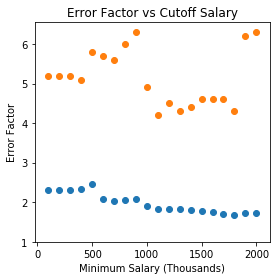

In [12]:
plot_with_cutoff_and_cols(cut,err,cols)

In [ ]:
cols

In [ ]:
d[d>np.log10(2e6)].shape